# Linear regression with NumPy
## Introduction
This notebook explains the steps and details the code to perform a linear regression with NumPy using two methods: gradient descent and the normal equation. Calculations use vectors to maximize speed of execution.
I initially wrote this notebook as an exercise to practice these methods and keep a trace of it, I hope it will be useful for somebody. Please comment if you notice mistakes, imprecision, or have a suggestion to make it better.

## Gradient descent
Gradient descent learns the parameters of a linear model of the data by minimizing the cost function, which represents the difference between the model and the data. For our purpose, this function is the mean squared error of the linear model. Let's first define the cost function.

In [1]:
#we will need Numpy for calculations, Matplotlib.pyplot for plotting,
#and also Pandas for data import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#definition of the cost function
def cost(X, Y, theta):
    """Return the mean squared error based on input matrix X, output vector Y, and linear model
    parameters theta"""
    return np.sum((np.dot(X, theta) - Y) ** 2) / 2 / len(Y)

Now let's define the function which performs the gradient descent. In addition to parameters theta of the linear model, it will return the history of the cost so we can visualize how well the gradient descent is doing, and compare between different learning rates.

In [2]:
def gradient_descent(X, Y, theta, alpha, n_iter):
    """Return learned parameters theta of linear model as calculated by gradient descent using
    input matrix X, output matrix Y, initial parameters theta, learning rate alpha and
    number of iteration n_iter"""
    #define matrix to store cost history
    cost_history = np.zeros(n_iter)
    #loop for n_iter iterations to perform gradient descent
    for i in range(n_iter):
        delta = np.dot(X.T, (np.dot(X, theta) - Y)) / len(Y) #derivative of cost function
        theta -= alpha * delta
        cost_history[i] = cost(X, Y, theta)
    return theta, cost_history

With the cost() and gradient_descent() functions we can now perform a linear regression. Here I use a built-in data set of R, called *state.x77.csv*. I exported it and you can find it in the same repository as this notebook. This data set contains socio-economic data for US states. If you plot pair of variables against each other, you will notice some of them have a pretty good correlation. We will analyze the correlation between the proportion of high school graduate and illiteracy, which have an intuitive relationship.

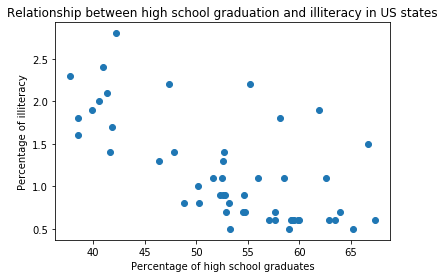

In [3]:
#read data from the csv file
data = pd.read_csv("state-x77.csv")
x_origin = data['HS Grad'] #we will need the original data later, I will keep them in this variable
y_origin = data['Illiteracy']

#plot data
_, ax = plt.subplots() #use underscore to define a variable we will not use
ax.scatter(x_origin, y_origin)
ax.set_xlabel("Percentage of high school graduates")
ax.set_ylabel("Percentage of illiteracy")
ax.set_title("Relationship between high school graduation and illiteracy in US states")
plt.show()

Before performing the gradient descent, we need to transform the data. First we will normalize the data, that is to say we subtract the mean from each data element and divide them by the standard deviation. Normalization is more important when variables in the data set have different orders of magnitude, but I could not get gradient descent work on the data used here without normalization. We transpose the data into column-vectors and add a column of "1", in order to do vectorized operations on them.

In [4]:
#feature normalization
mu = np.mean(x_origin) #calculate the mean
sigma = np.std(x_origin) #calculate the standard deviation
x = (x_origin - mu) / sigma

#put x into column-vector and add column of "1" for vector operations
x = np.array(x)[:, np.newaxis] #x into column-vector
x1 = np.ones((len(x), 1)) #create column of "1"
x = np.concatenate((x1, x), axis=1) #add column of "1" to x

#later we will need a matrix containing a column of "1" and non-normalized data in the other columns
x_origin_ones = np.concatenate((x1, x_origin[:, np.newaxis]), axis=1)

#put y into a column-vector
y = np.array(y_origin)[:, np.newaxis]

Now we can perform the linear regression by gradient descent. First we set parameters theta to 0 and the number of iterations to 10,000. It's much more than what is necessary when the learning rate is optimal but a high number of iterations allows us to compare different learning rates.

In [5]:
theta = np.zeros((2, 1))
n_iter = 10000
theta, history = gradient_descent(x, y, theta, alpha=0.01, n_iter=n_iter)

Remember we normalized the input before gradient descent, so the parameters theta reflect this. We need to apply a couple calculations to get theta to the same scale as the original data. To understand what operations to do on theta, remember the relationship between theta, x and y : y_1 = theta_0 + theta_1 * (x_1 - mu_1) / sigma_1.
For just one feature the calculations look complicated but this way they work with several features as well.

In [11]:
#create column vector with single one to add to mu and sigma for vectorized operations
one = np.array([1])[:, np.newaxis]
#put mu in column vector and add "-1" on the first line
mu = np.array([mu])[:, np.newaxis]
mu = np.concatenate((-one, mu))

#do the same for sigma
sigma = np.concatenate((one, np.array([sigma])[:, np.newaxis]))

#apply mu and sigma to theta to scale theta back to the original data
theta[0] = -np.sum(theta * mu / sigma)
theta[1:] = theta[1:] / sigma[1:]
print("\n\nCalculated theta (gradient descent) :\nintercept :",
      format(theta[0].flat[0], '.4f'), "\nslope :", format(theta[1].flat[0], '.4f'))



Calculated theta (gradient descent) :
intercept : 3.8039 
slope : -0.0496


Finally, we can plot the data along with the regression line

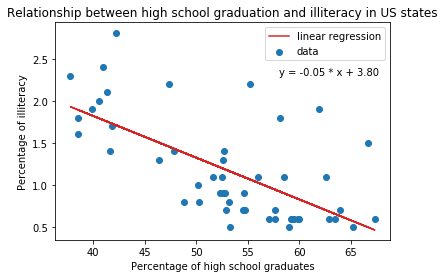

In [7]:
_, ax = plt.subplots()
ax.scatter(x_origin, y_origin, label="data")
ax.plot(x_origin, np.dot(x_origin_ones, theta), color="C3", label="linear regression")
ax.text(58, 2.3, "y = {0:.2f} * x + {1:.2f}".format(theta[1].flat[0], theta[0].flat[0]))
ax.set_xlabel("Percentage of high school graduates")
ax.set_ylabel("Percentage of illiteracy")
ax.set_title("Relationship between high school graduation and illiteracy in US states")
ax.legend()
plt.show()

We can also perform the gradient descent with different learning rates to compare the speed at which gradient descent converges towards the minimum cost by plotting the cost *VS* the number of iterations.

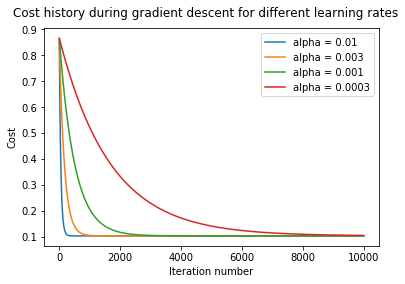

In [14]:
#re-initialize theta and calculate it with three other learning rate values
theta = np.zeros((2, 1))
_, history2 = gradient_descent(x, y, theta, alpha=0.003, n_iter=n_iter)
theta = np.zeros((2, 1))
_, history3 = gradient_descent(x, y, theta, alpha=0.001, n_iter=n_iter)
theta = np.zeros((2, 1))
_, history4 = gradient_descent(x, y, theta, alpha=0.0003, n_iter=n_iter)

#plot history cost calculated during gradient descent
x_val = [i for i in range(n_iter)]
fig, ax = plt.subplots()
ax.plot(x_val, history, label="alpha = 0.01")
ax.plot(x_val, history2, label="alpha = 0.003")
ax.plot(x_val, history3, label="alpha = 0.001")
ax.plot(x_val, history4, label="alpha = 0.0003")
ax.set_xlabel("Iteration number")
ax.set_ylabel("Cost")
fig.text(0.5, 0.92, "Cost history during gradient descent for different learning rates", ha="center", fontsize=12)
ax.legend()
plt.show()

## Normal equation
We can also solve the problem of finding the parameters theta analytically, using the normal equation. This equation calculates theta in a single step, which prevents us from having to choose a learning rate and going through many iterations during the gradients descent. In addition, there is no need to normalize the data. However, if the sample size is large (> 10,000), calculation using the normal equation may be longer than gradient descent. Let's define the function calculating theta using the normal equation and then use it on the same data as above.



Calculated theta (normal equation) :
intercept : 3.8039 
slope : -0.0496


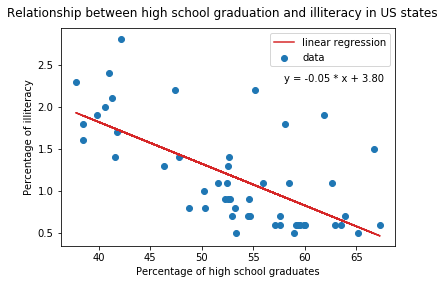

In [17]:
def norm_eq(X, Y):
    """Return linear regression parameters theta for X and Y by using the normal equation."""
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)

theta = norm_eq(x_origin_ones, y)

print("\n\nCalculated theta (normal equation) :\nintercept :",
     format(theta[0].flat[0], '.4f'), "\nslope :", format(theta[1].flat[0], '.4f'))

#plot data with linear regression line
fig, ax = plt.subplots()
ax.scatter(x_origin, y_origin, label="data")
ax.plot(x_origin, np.dot(x_origin_ones, theta), color="C3", label="linear regression")
ax.text(58, 2.3, "y = {0:.2f} * x + {1:.2f}".format(theta[1].flat[0], theta[0].flat[0]))
ax.set_xlabel("Percentage of high school graduates")
ax.set_ylabel("Percentage of illiteracy")
fig.text(0.5, 0.92, "Relationship between high school graduation and illiteracy in US states", ha="center", fontsize=12)
ax.legend()
plt.show()